# Ανάλυση Ανεργίας στην Ελλάδα (1991–2024)
#**Πηγή δεδομένων:**  World Bank – World Development Indicators  

**Δείκτης:** *Unemployment, total (% of total labour force)*  
**Κωδικός δείκτη:** `SL.UEM.TOTL.ZS`  
**Χώρα:** Ελλάδα (GRC)  
**Περίοδος:** 1991–2024  
**Πηγή αρχείου:** [World Bank Open Data](https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?locations=GR)  
**API download link:** [https://api.worldbank.org/v2/en/country/GRC/indicator/SL.UEM.TOTL.ZS?downloadformat=csv](https://api.worldbank.org/v2/en/country/GRC/indicator/SL.UEM.TOTL.ZS?downloadformat=csv)

### Στόχος
**Η ανάλυση εξετάζει την εξέλιξη του ποσοστού ανεργίας στην Ελλάδα από το 1991 έως το 2024,  
βάσει των δεδομένων της Παγκόσμιας Τράπεζας (World Bank).

**Στόχος είναι:
**να απεικονιστεί η τάση της ανεργίας μέσα στον χρόνο,  
**να εντοπιστούν περίοδοι αιχμής (π.χ. οικονομική κρίση 2010–2015),  
**και να εξαχθούν συμπεράσματα για την πορεία της αγοράς εργασίας στην Ελλάδα.

---

###  Εργαλεία που χρησιμοποιούνται
**Python 3**
**Pandas** – επεξεργασία & καθαρισμός δεδομένων  
**Matplotlib** – οπτικοποίηση (visualization)  
**Jupyter Notebook** – ανάλυση & παρουσίαση

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Θα παραλείψουμε τις 4 πρώτες γραμμές από την World Bank 
df=pd.read_csv("API_GRC_SL.UEM.TOTL.ZS_EN_csv_v2_219008.csv", skiprows = 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1 non-null      object 
 1   Country Code    1 non-null      object 
 2   Indicator Name  1 non-null      object 
 3   Indicator Code  1 non-null      object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      float64

In [7]:
# Με βοήθεια από το chatgpt βρήκα μια μέθοδο όπου "καθαρίζει" και "ορίζει" από wide μορφή σε Long μορφή 
#Την μέθοδο .melt()
gr = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="UnemploymentRate")

In [8]:
#Θα πρέπει να κάνω μετατροπή τύπων διότι δοκίμασα  και δεν ειναι numeric οι τύποι
#errors = "coerce"
gr["Year"] = pd.to_numeric(gr["Year"], errors="coerce")
gr["UnemploymentRate"] = pd.to_numeric(gr["UnemploymentRate"], errors="coerce")
gr = gr.dropna(subset=["UnemploymentRate"])
gr.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,UnemploymentRate
31,Greece,GRC,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1991.0,7.572
32,Greece,GRC,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1992.0,8.927
33,Greece,GRC,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1993.0,10.177
34,Greece,GRC,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1994.0,9.808
35,Greece,GRC,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,1995.0,10.116


In [9]:
gr.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Year', 'UnemploymentRate'],
      dtype='object')

In [10]:
#Δεν χρειαζόμαστε δυο στήλες όπου μας δείχνουν το αποτέλεσμα όπως την country code και κραταμε την country name 
gr.drop(columns=["Country Code","Indicator Name" ,"Indicator Code"], inplace=True)


In [11]:
gr.head()

,Country Name,Year,UnemploymentRate
31,Greece,1991.0,7.572
32,Greece,1992.0,8.927
33,Greece,1993.0,10.177
34,Greece,1994.0,9.808
35,Greece,1995.0,10.116


In [12]:
#θα αλλάξω το όνομα των δεδομένων απο την στήλη indicator name διότι δεν είναι αισθητικά ωραίες 
gr["Indicator Name"] = "Unemployment rate (%)"

In [13]:
gr.head()

,Country Name,Year,UnemploymentRate,Indicator Name
31,Greece,1991.0,7.572,Unemployment rate (%)
32,Greece,1992.0,8.927,Unemployment rate (%)
33,Greece,1993.0,10.177,Unemployment rate (%)
34,Greece,1994.0,9.808,Unemployment rate (%)
35,Greece,1995.0,10.116,Unemployment rate (%)


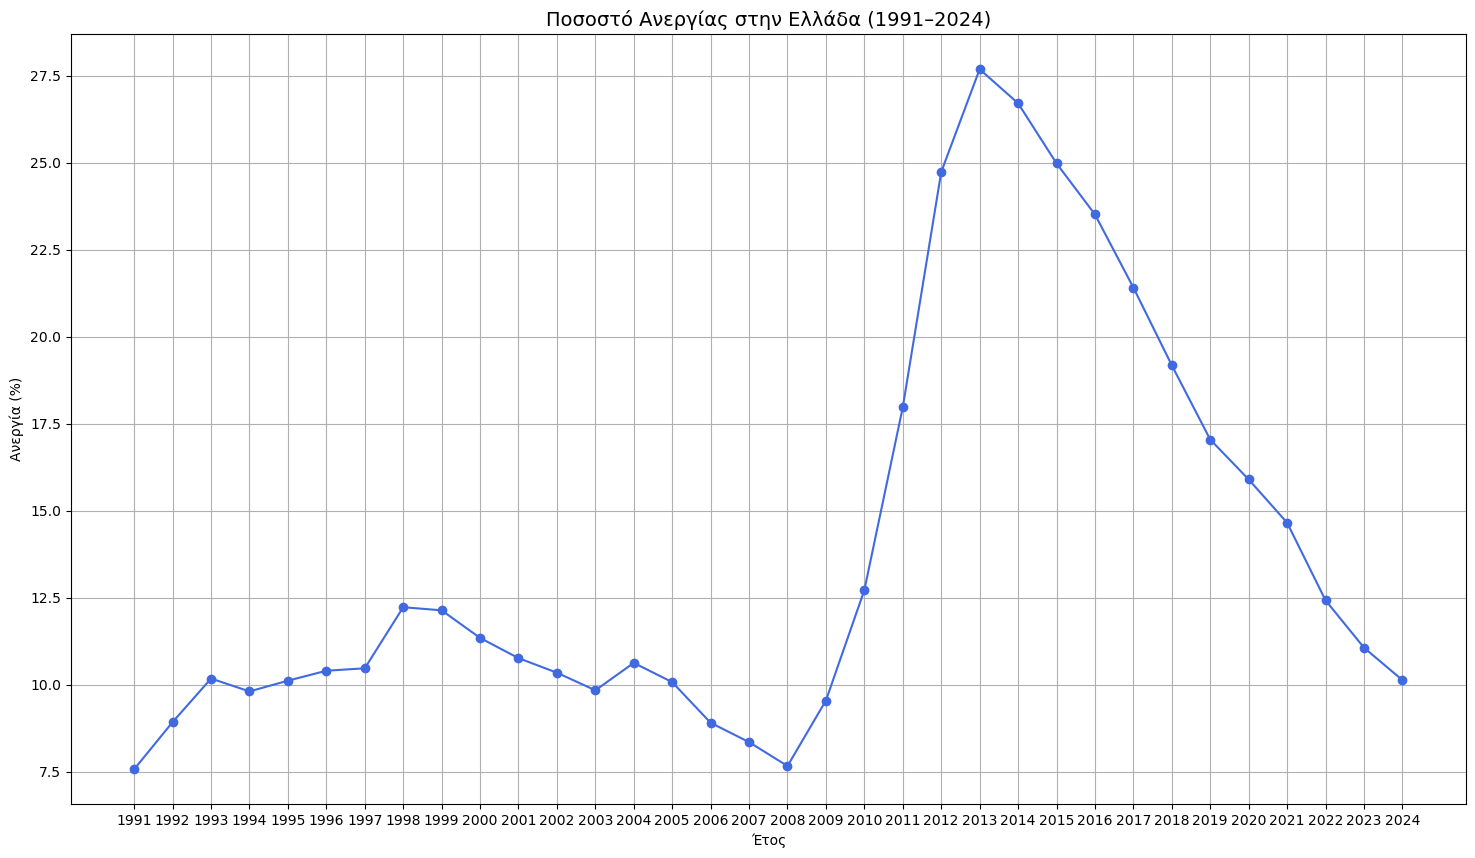

In [18]:
#Τάση Ανεργίας Ανά έτος 
plt.figure(figsize=(18,10))
plt.plot(gr["Year"], gr["UnemploymentRate"], marker='o', color='royalblue')
plt.title("Ποσοστό Ανεργίας στην Ελλάδα (1991–2024)", fontsize=14)
plt.xticks(range(1991,2025,1))
plt.xlabel("Έτος")
plt.ylabel("Ανεργία (%)")
plt.grid(True)
plt.show()


In [20]:
print("Έτη διαθέσιμα:", int(gr["Year"].min()), "-", int(gr["Year"].max()))
print("Μέσο ποσοστό ανεργίας:", round(gr["UnemploymentRate"].mean(), 2), "%")
print("Μέγιστο ποσοστό ανεργίας:", round(gr["UnemploymentRate"].max(), 2), "%")
print("Ελάχιστο ποσοστό ανεργίας:", round(gr["UnemploymentRate"].min(), 2), "%")


Έτη διαθέσιμα: 1991 - 2024
Μέσο ποσοστό ανεργίας: 13.81 %
Μέγιστο ποσοστό ανεργίας: 27.69 %
Ελάχιστο ποσοστό ανεργίας: 7.57 %


In [21]:
# Θα Δημιουργήσουμε μια νέα στήλη "Decade" που δείχνει σε ποια δεκαετία ανήκει κάθε έτος και θα υπολογίσουμε την μέση ανεργία
gr["Decade"] = (gr["Year"] // 10 * 10).astype(int)

# Ομαδοποίηση και υπολογισμός μέσου ποσοστού ανεργίας ανά δεκαετία
decade_avg = gr.groupby("Decade")["UnemploymentRate"].mean().reset_index()

decade_avg


,Decade,UnemploymentRate
0,1990,10.204333
1,2000,9.746300
2,2010,21.594900
3,2020,12.836000


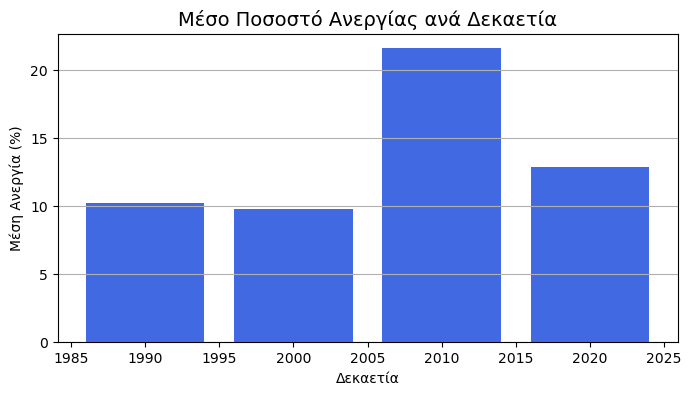

In [22]:
#Εξέλιξη Ανεργίας Ανά Δεκαετία με δημιουργία ακτηγοριών bins / στρογγυλοποίηση χρονικών δεδομένων (με ετος//10 ,*10)
plt.figure(figsize=(8,4))
plt.bar(decade_avg["Decade"], decade_avg["UnemploymentRate"], width=8, color="royalblue")
plt.title("Μέσο Ποσοστό Ανεργίας ανά Δεκαετία", fontsize=14)
plt.xlabel("Δεκαετία")
plt.ylabel("Μέση Ανεργία (%)")
plt.grid(axis='y')
plt.show()


In [26]:
gr.to_csv(r"C:\Users\i.ntouras\OneDrive - Hellenic Electricity Distribution Network Operator S.A\Επιφάνεια εργασίας\Unemployment-analysis- Greece\data\Clean.csv", index=False)
